<a href="https://colab.research.google.com/github/Marco-Puig/Animal-Crossing-Item-Economy-Models/blob/main/AnimalCrossingNookDataPipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis**

In [ ]:
# Need Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# items dataset
items = pd.read_csv('items.csv')
items.head()

# There are Odd Data Types such as 'NFS' or 'NA'
# Also there are Missing Values and Distributions that need to be cleaned/organized

,Name,DIY,Stack Size,Buy,Sell,Miles Price,Source,Source Notes,Tag,Color 1,Color 2,Version,Filename,Internal ID,Unique Entry ID
0,acorn,No,30,NFS,200.0,NaN,Shaking a hardwood tree (Fall),NaN,NaN,NaN,NaN,1.0.0,DIYAcorn,5727,LWRPyLkySfCNkDvdv
1,apple,No,10,400,500.0,NaN,Apple tree,NaN,NaN,NaN,NaN,1.0.0,Apple,2213,iTWs2LBrcFu8XyDMF
2,apple tree,No,1,NFS,300.0,NaN,Planting an apple,NaN,Plants,NaN,NaN,1.0.0,PltApple4,3360,4BFZn59FMC5eyCKXS
3,Aquarius fragment,No,10,NFS,500.0,NaN,Wishing on shooting stars (January 20 - Februa...,NaN,NaN,NaN,NaN,1.0.0,StarpieceAquarius,5986,sHWduQNusYLWRjhzb
4,arched tile path permit,No,1,NFS,NaN,2000.0,Nook Miles Redemption,Found under the Special tab of the Nook Miles ...,NaN,NaN,NaN,1.0.0,FtrGroundMakerStonePattern,8776,yDajuWo93WGgTR4bJ


In [ ]:
items.describe()

# Note: Stack Size means Carry Amount

,Stack Size,Sell,Miles Price,Internal ID
count,353.000000,282.000000,21.000000,353.000000
mean,10.082153,287.255319,2761.904762,5221.405099
std,53.807385,1273.428272,1902.492100,3024.620777
min,1.000000,0.000000,500.000000,1374.000000
25%,1.000000,40.000000,2000.000000,2980.000000
50%,10.000000,80.000000,2000.000000,3858.000000
75%,10.000000,200.000000,3000.000000,7374.000000
max,1000.000000,16000.000000,8000.000000,12757.000000


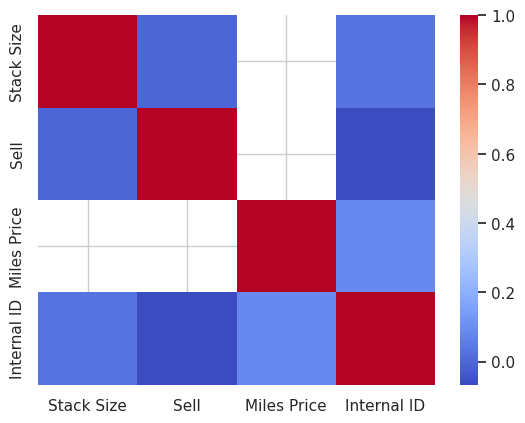

In [ ]:
# We mainly cause about what is correlated to the buy/sale price
items_corr = items.select_dtypes(include=[np.number]).corr() # dropping non-numeric features
sns.heatmap(items_corr, cmap='coolwarm')
plt.show()

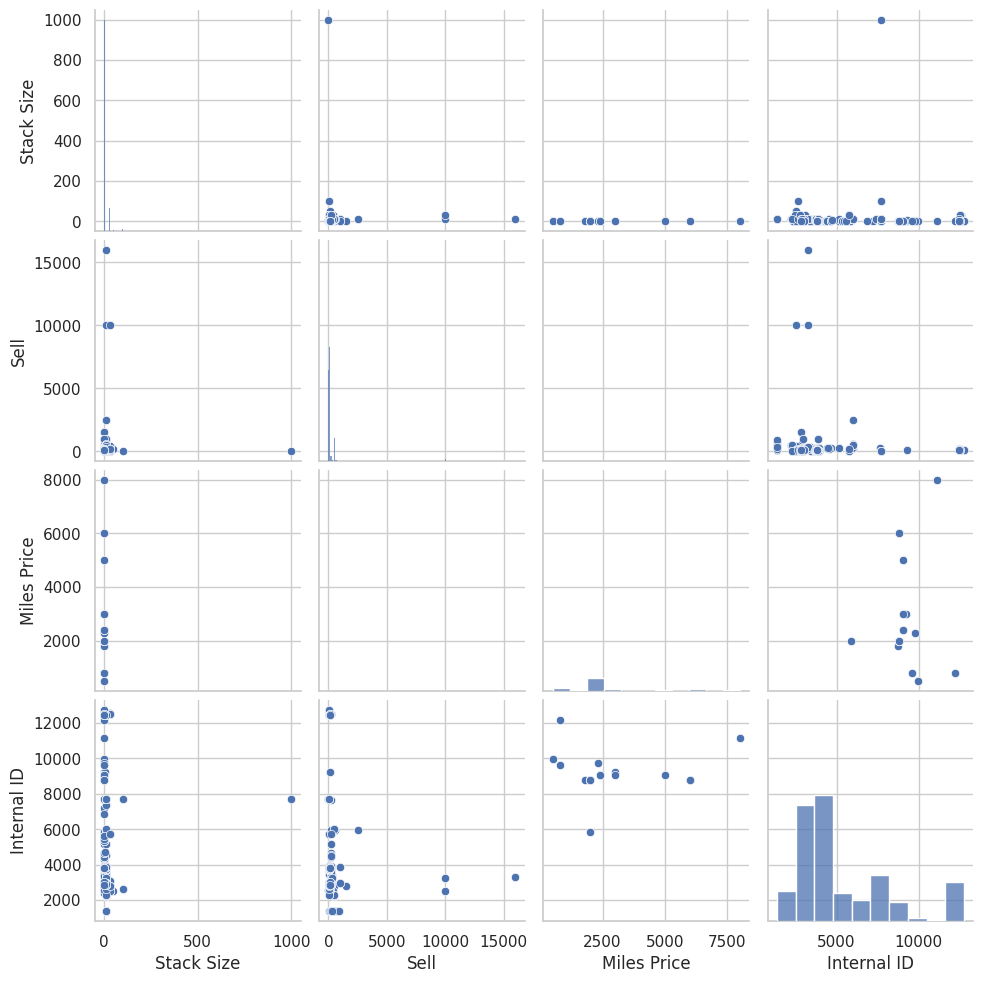

In [ ]:
# Now let's see how all of these are layed out
numeric_items = items.select_dtypes(include=[np.number])
sns.pairplot(numeric_items)
plt.show()

**Data Preprocessing**

In [ ]:
# Missing values
print("Missing Values Before Handling: ", items.isnull().sum())

# Fix by filling missing numeric values with the median
numeric_cols = items.select_dtypes(include=[np.number]).columns
items[numeric_cols] = items[numeric_cols].fillna(items[numeric_cols].median())

# Fix by fill missing categorical values with the mode
categorical_cols = items.select_dtypes(include=[object]).columns
for col in categorical_cols:
    items[col].fillna(items[col].mode()[0], inplace=True)

Missing Values Before Handling:  Name                 0
DIY                  0
Stack Size           0
Buy                  0
Sell                71
Miles Price        332
Source              44
Source Notes       334
Tag                203
Color 1            300
Color 2            300
Version              0
Filename             0
Internal ID          0
Unique Entry ID      0
dtype: int64


<ipython-input-20-1b03e8b088fa>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  items[col].fillna(items[col].mode()[0], inplace=True)


In [ ]:
print("\nMissing Values After Handling:")
print(items.isnull().sum()) # Show zero - since we have now corrected it


Missing Values After Handling:
Name               0
DIY                0
Stack Size         0
Buy                0
Sell               0
Miles Price        0
Source             0
Source Notes       0
Tag                0
Color 1            0
Color 2            0
Version            0
Filename           0
Internal ID        0
Unique Entry ID    0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Scaler

# Select numeric columns for scaling
numeric_cols = items.select_dtypes(include=[np.number]).columns

# Standarize
scaler = StandardScaler()
items[numeric_cols] = scaler.fit_transform(items[numeric_cols])

# Check the transformed data
print("\nAfter Scaling:")
print(items[numeric_cols].head())



After Scaling:
   Stack Size      Sell  Miles Price  Internal ID
0    0.370695 -0.040001    -0.092997     0.167397
1   -0.001529  0.223342    -0.092997    -0.996051
2   -0.169030  0.047780    -0.092997    -0.616291
3   -0.001529  0.223342    -0.092997     0.253149
4   -0.169030 -0.145339    -0.092997     1.176888


In [ ]:
# HANDLE OUTLIERS
# IQR METHOD
Q1 = items[numeric_cols].quantile(0.25)
Q3 = items[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Not start to remove outliers by capping values
for col in numeric_cols:
    items[col] = np.where(items[col] < lower_bound[col], lower_bound[col], items[col])
    items[col] = np.where(items[col] > upper_bound[col], upper_bound[col], items[col])

print("\nData After Outlier Treatment:")
print(items.describe())



Data After Outlier Treatment:
       Stack Size        Sell   Miles Price   Internal ID
count  353.000000  353.000000  3.530000e+02  3.530000e+02
mean    -0.067354   -0.119549 -9.299695e-02 -1.635456e-17
std      0.116358    0.067947  4.586171e-16  1.001419e+00
min     -0.169030   -0.215564 -9.299695e-02 -1.273834e+00
25%     -0.169030   -0.162895 -9.299695e-02 -7.421051e-01
50%     -0.001529   -0.145339 -9.299695e-02 -4.514088e-01
75%     -0.001529   -0.092670 -9.299695e-02  7.127010e-01
max      0.249722    0.012667 -9.299695e-02  2.494955e+00


**Feature Engineering**

In [ ]:
# Creating new features that would be helpful for the pipeline and model

# Profit margin feature
# Remove 'NA' and/or 'NTS' since they mean Null Values
items['Buy'] = pd.to_numeric(items['Buy'], errors='coerce')
items['Sell'] = pd.to_numeric(items['Sell'], errors='coerce')
items['Buy'].fillna(0, inplace=True)
items['Sell'].fillna(0, inplace=True)

# Create profit margin feature
items['Profit_Margin'] = items['Buy'] - items['Sell']

# Map 'DIY' to a binary flag
items['DIY_Flag'] = items['DIY'].map({'Yes': 1, 'No': 0})

# Combine 'Color 1' and 'Color 2' into 'Color_Combo'
items['Color_Combo'] = items['Color 1'] + '_' + items['Color 2']

# New features working:
print(items[['Profit_Margin', 'DIY_Flag', 'Color_Combo']].head())

   Profit_Margin  DIY_Flag Color_Combo
0       0.040001         0   Red_Green
1     399.987333         0   Red_Green
2      -0.012667         0   Red_Green
3      -0.012667         0   Red_Green
4       0.145339         0   Red_Green


<ipython-input-31-46fbc906373c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  items['Buy'].fillna(0, inplace=True)
<ipython-input-31-46fbc906373c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

In [ ]:
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(items[numeric_cols])

# Apply PCA
pca = PCA(n_components=2)  # Adjust n_components based on the variance you want to retain
principal_components = pca.fit_transform(numeric_scaled)
items['PCA1'] = principal_components[:, 0]
items['PCA2'] = principal_components[:, 1]

# Check explained variance ratio
print("\nExplained Variance Ratio by PCA Components:")
print(pca.explained_variance_ratio_)

# Display PCA features
print("\nPCA Features Added:")
print(items[['PCA1', 'PCA2']].head())


Explained Variance Ratio by PCA Components:
[0.40920182 0.3018519 ]

PCA Features Added:
       PCA1      PCA2
0  2.236041  1.296103
1  2.014785  0.415714
2  0.935068  0.459407
3  1.330336  1.416652
4 -1.393665  0.568024


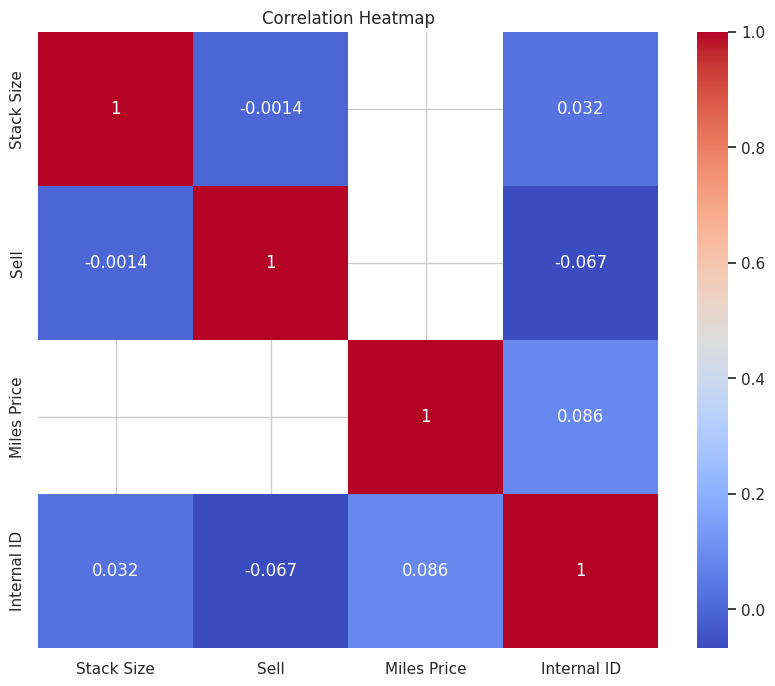

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# First let's figure out what to make a the Target variable
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(items_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Selected Features by RFE:
Index(['Buy', 'Internal ID', 'Profit_Margin', 'PCA1', 'PCA2'], dtype='object')

Feature Importance:
         Feature  Importance
4  Profit_Margin    0.835047
6           PCA1    0.075858
1            Buy    0.063429
3    Internal ID    0.016202
7           PCA2    0.008068
0     Stack Size    0.001248
5       DIY_Flag    0.000148
2    Miles Price    0.000000


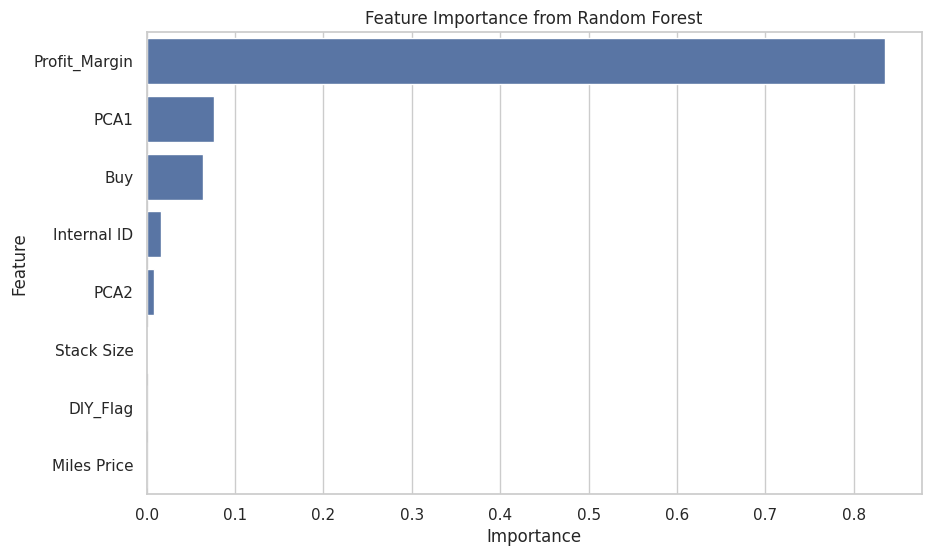

In [ ]:
# Recursive Feature Elimination (RFE) with Random Forest
X = items.drop(['Sell'], axis=1)  # Drop the target variable
y = items['Sell']  # Target variable

# Select numeric columns only for modeling
X = X.select_dtypes(include=[np.number])

# Use RandomForest for feature ranking
model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
fit = rfe.fit(X, y)

# Print selected features
selected_features = X.columns[fit.support_]
print("\nSelected Features by RFE:")
print(selected_features)

# Feature Importance from Random Forest
model.fit(X, y)
importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance from Random Forest")
plt.show()

**Model Building**

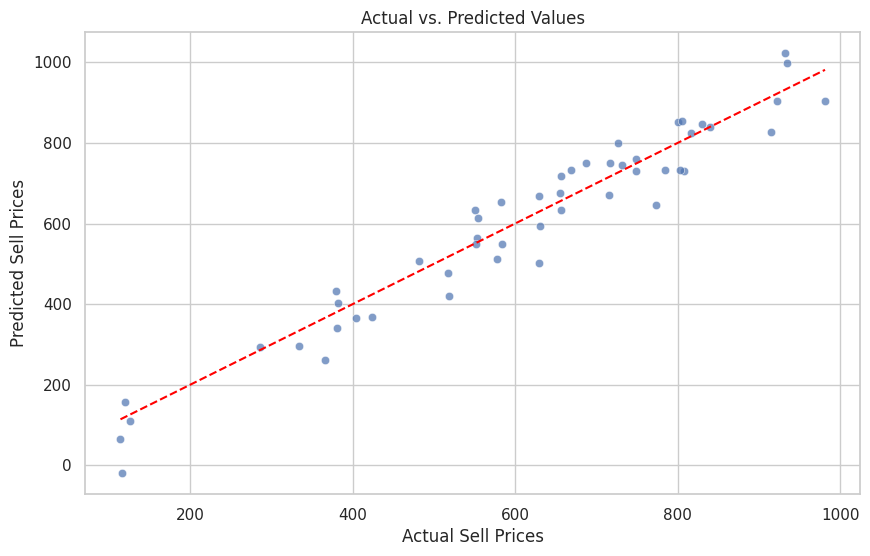

In [ ]:
# Linear Regression Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = items[['Buy', 'DIY_Flag', 'Profit_Margin']]  # relevant features
y = items['Sell']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# prediciton for r2 score
y_pred = lr_model.predict(X_test)

# Plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Sell Prices')
plt.ylabel('Predicted Sell Prices')
plt.show()

In [ ]:
# model results/stats
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score
print("\nLinear Regression Stats:")
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")


Linear Regression Stats:
RMSE: 59.95038077668834
R^2 Score: 0.9276177817809412


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



K-Means Clustering Model Evaluation:
Silhouette Score: 0.8357172966353272


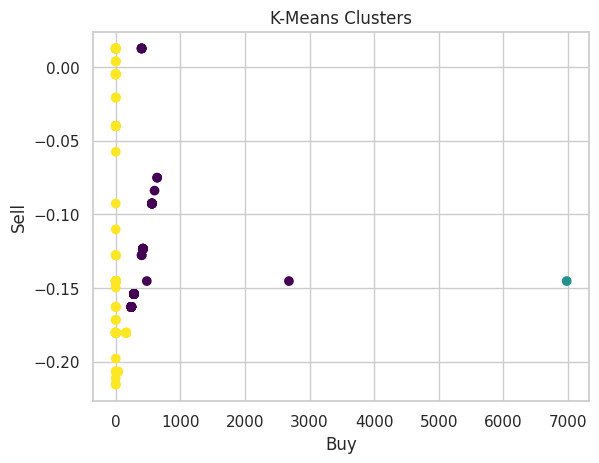

In [ ]:
# Clustering Model

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select numeric features for clustering
clustering_features = items[['Buy', 'Sell', 'Profit_Margin']]

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the number of clusters (k)
kmeans.fit(clustering_features)

# Assign cluster labels to each data point
items['Cluster'] = kmeans.labels_

# Evaluate the clustering model
silhouette_avg = silhouette_score(clustering_features, kmeans.labels_)  # Silhouette Score

print("\nK-Means Clustering Model Evaluation:")
print(f"Silhouette Score: {silhouette_avg}")

# Visualize clusters (optional, for 2D projections)
import matplotlib.pyplot as plt
plt.scatter(clustering_features['Buy'], clustering_features['Sell'], c=items['Cluster'], cmap='viridis')
plt.xlabel('Buy')
plt.ylabel('Sell')
plt.title('K-Means Clusters')
plt.show()

**Model Evaluation and Hyperparameter Tuning**


Linear Regression Cross-Validation Results:
Average RMSE: 9.037485672985028e-13
Average R^2: 0.9276177817809412


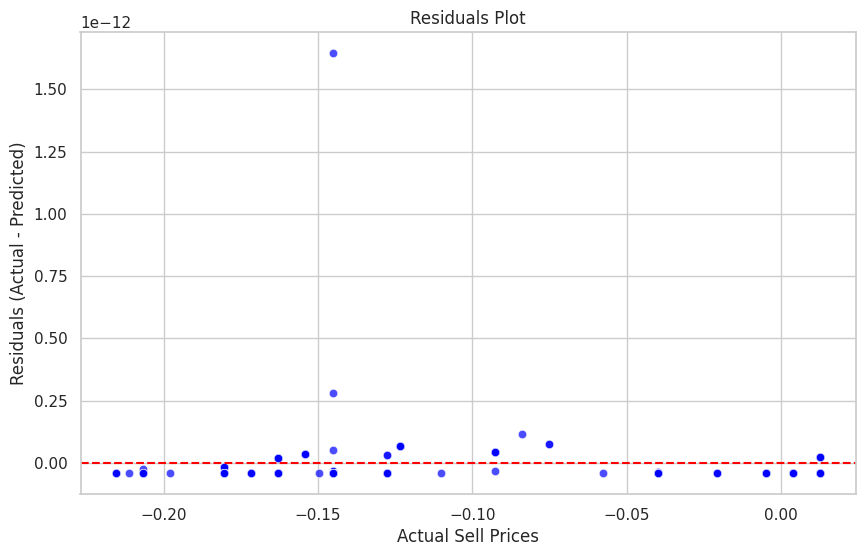

In [ ]:
# Linear Regression: Cross-Validation and Residuals Visualization

from sklearn.model_selection import KFold, cross_val_score

# Features and target
X = items[['Buy', 'DIY_Flag', 'Profit_Margin']]  # Relevant features
y = items['Sell']  # Target variable

# Initialize Linear Regression model
lr_model = LinearRegression()

# Apply 5-Fold Cross-Validation for RMSE
kf = KFold(n_splits=5, shuffle=True, random_state=43)
cv_rmse = -cross_val_score(lr_model, X, y, scoring='neg_root_mean_squared_error', cv=kf)
cv_r2 = cross_val_score(lr_model, X, y, scoring='r2', cv=kf)
print("\nLinear Regression Cross-Validation Results:")
print(f"Average RMSE: {np.mean(cv_rmse)}")
print(f"Average R^2: {np.mean(r2)}")

# Train model on the entire dataset and analyze residuals
lr_model.fit(X, y)
y_pred = lr_model.predict(X)

# Scatter plot
residuals = y - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=residuals, alpha=0.7, color="blue")
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Actual Sell Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()


New Avg. Silhouette Scores: 0.9213210872098652

Number of Clusters (k): 9


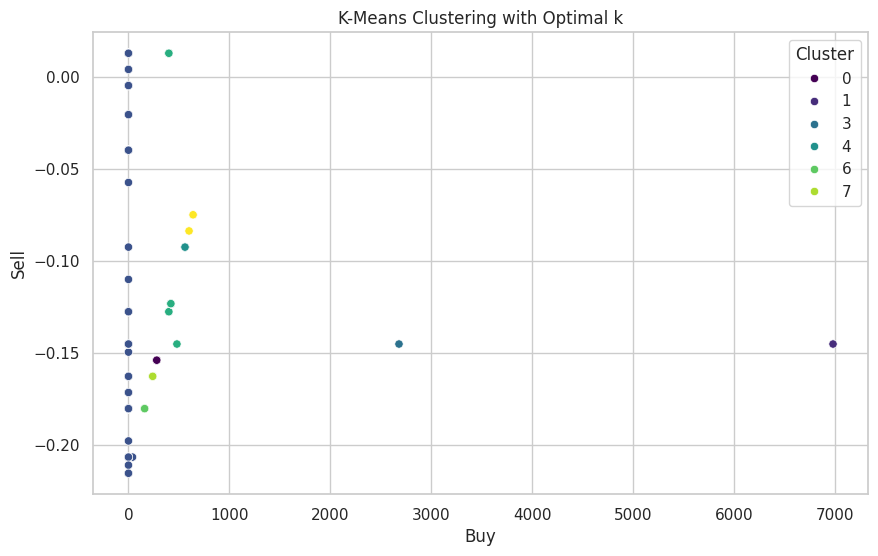

In [ ]:
# K-Means Clustering: Hyperparameter Tuning with Silhouette Score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Features for clustering
clustering_features = items[['Buy', 'Sell', 'Profit_Margin']]

# Determine optimal number of clusters
silhouette_scores = []
k_values = range(2, 11)  # Test k from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_features)
    score = silhouette_score(clustering_features, kmeans.labels_)
    silhouette_scores.append(score)

# Optimal k based on Silhouette Score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"\nNew Avg. Silhouette Scores: {np.mean(silhouette_scores)}")
print(f"\nNumber of Clusters (k): {optimal_k}")

# Train K-Means with optimal k
optimal_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
items['Optimal_Cluster'] = optimal_kmeans.fit_predict(clustering_features)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=clustering_features['Buy'], y=clustering_features['Sell'], hue=items['Optimal_Cluster'], palette='viridis')
plt.title('K-Means Clustering with Optimal k')
plt.xlabel('Buy')
plt.ylabel('Sell')
plt.legend(title='Cluster')
plt.show()